# Machine Learning (COSC2673)


## Assignment 2: Machine Learning Project
## Project 1 - Classify Images of Colon Cancer


### Arya Baddam


### Vaibhav Jain


#### Group 95

Problem Statement:

Our goal is to develop a machine learning system that can classify histopathology images of colon cells based on whether the cell is **cancerous** (`isCancerous`) and to find out what **cell type** it belongs to: `epithelial`, `fibroblast`, `inflammatory`, or `others`

# TASK 1:

In [5]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
from PIL import Image
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler, Normalizer
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

In [7]:
# This code loads both of the label files
main_data = pd.read_csv("Image_classification_data/data_labels_mainData.csv")
extra_data = pd.read_csv("Image_classification_data/data_labels_extraData.csv")

In [11]:
main_data

,InstanceID,patientID,ImageName,cellTypeName,cellType,isCancerous
0,22405,1,22405.png,fibroblast,0,0
1,22406,1,22406.png,fibroblast,0,0
2,22407,1,22407.png,fibroblast,0,0
3,22408,1,22408.png,fibroblast,0,0
4,22409,1,22409.png,fibroblast,0,0
...,...,...,...,...,...,...
9891,1625,60,1625.png,epithelial,2,1
9892,1626,60,1626.png,epithelial,2,1
9893,1627,60,1627.png,epithelial,2,1
9894,1628,60,1628.png,epithelial,2,1


In [12]:
extra_data

,InstanceID,patientID,ImageName,isCancerous
0,12681,61,12681.png,0
1,12682,61,12682.png,0
2,12683,61,12683.png,0
3,12684,61,12684.png,0
4,12685,61,12685.png,0
...,...,...,...,...
10379,20028,99,20028.png,0
10380,20029,99,20029.png,0
10381,20030,99,20030.png,0
10382,20031,99,20031.png,0


In [8]:
IMAGE_DIR = "Image_classification_data/patch_images/"

### Exploratory Data Analysis

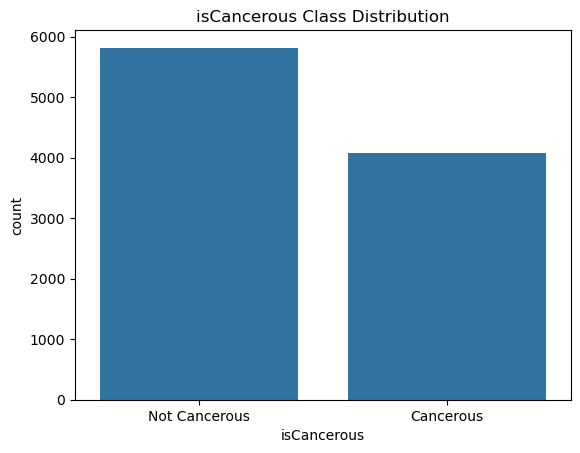

In [9]:
# Visualising class imbalance
sns.countplot(data=main_data, x='isCancerous')
plt.title("isCancerous Class Distribution")
plt.xticks([0, 1], ["Not Cancerous", "Cancerous"])
plt.show()

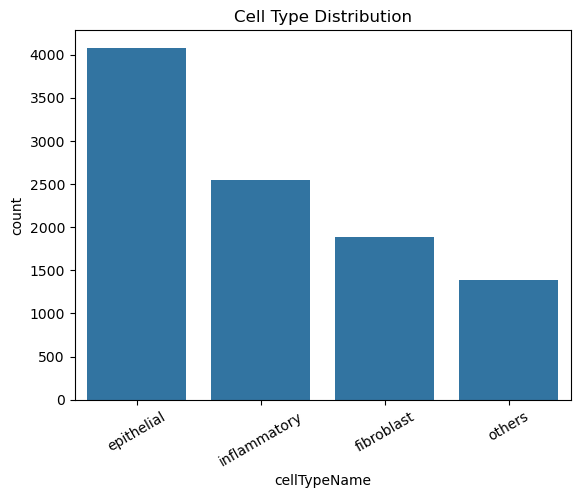

In [10]:
sns.countplot(data=main_data, x='cellTypeName', order=main_data['cellTypeName'].value_counts().index)
plt.title("Cell Type Distribution")
plt.xticks(rotation=30)
plt.show()

### Image Loader

In [13]:
def load_images(df, label_col, image_col='ImageName', image_dir=IMAGE_DIR):
    X, y = [], []
    for _, row in df.iterrows():
        img_path = os.path.join(image_dir, row[image_col])
        if os.path.exists(img_path):
            img = Image.open(img_path).convert('RGB').resize((27, 27))
            X.append(np.array(img).flatten())
            y.append(row[label_col])
    return np.array(X), np.array(y)

### Binary Classification - isCancerous

In [14]:
X_cancer, y_cancer = load_images(main_data, label_col='isCancerous')
image_names = main_data['ImageName'].values

In [15]:
# Train/Test split
X_train_c, X_test_c, y_train_c, y_test_c, name_train, name_test = train_test_split(
    X_cancer, y_cancer, image_names, test_size=0.2, stratify=y_cancer, random_state=42)

In [16]:
# Train Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_c, y_train_c)
y_pred_c = rf_model.predict(X_test_c)

Random Forest - Binary Classification (isCancerous)
              precision    recall  f1-score   support

           0       0.88      0.92      0.90      1164
           1       0.87      0.82      0.85       816

    accuracy                           0.88      1980
   macro avg       0.88      0.87      0.87      1980
weighted avg       0.88      0.88      0.88      1980



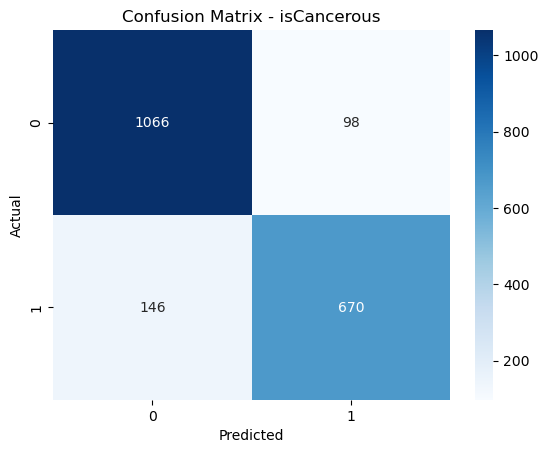

In [17]:
# Evaluation
print("Random Forest - Binary Classification (isCancerous)")
print(classification_report(y_test_c, y_pred_c))
sns.heatmap(confusion_matrix(y_test_c, y_pred_c), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - isCancerous")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

### Multi-Class Classification - cellTypeName

In [18]:
X_type, y_type = load_images(main_data, label_col='cellTypeName')
le = LabelEncoder()
y_type_encoded = le.fit_transform(y_type)
image_names_type = main_data['ImageName'].values

In [19]:
X_train_t, X_test_t, y_train_t, y_test_t, name_train_t, name_test_t = train_test_split(
    X_type, y_type_encoded, image_names_type, test_size=0.2, stratify=y_type_encoded, random_state=42)

In [20]:
rf_type = RandomForestClassifier(n_estimators=100, random_state=42)
rf_type.fit(X_train_t, y_train_t)
y_pred_t = rf_type.predict(X_test_t)

Random Forest - Multiclass Classification of (cellTypeName)
              precision    recall  f1-score   support

  epithelial       0.76      0.92      0.84       816
  fibroblast       0.64      0.58      0.61       378
inflammatory       0.63      0.78      0.69       509
      others       0.79      0.08      0.14       277

    accuracy                           0.70      1980
   macro avg       0.70      0.59      0.57      1980
weighted avg       0.71      0.70      0.66      1980



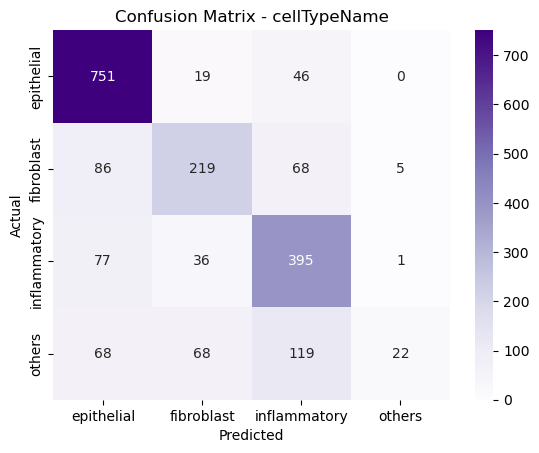

In [27]:
print("Random Forest - Multiclass Classification of (cellTypeName)")
print(classification_report(y_test_t, y_pred_t, target_names=le.classes_))
sns.heatmap(confusion_matrix(y_test_t, y_pred_t), annot=True, fmt='d', cmap='Purples',
            xticklabels=le.classes_, yticklabels=le.classes_)
plt.title("Confusion Matrix - cellTypeName")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

### Boosted Model Evaluation using data_labels_extraData.csv

In [31]:
combined_df = pd.concat([main_data[['ImageName', 'isCancerous']], extra_data[['ImageName', 'isCancerous']]])
X_boost, y_boost = load_images(combined_df, label_col='isCancerous')

In [32]:
X_train_b, X_test_b, y_train_b, y_test_b = train_test_split(X_boost, y_boost, test_size=0.2, stratify=y_boost, random_state=42)
boosted_model = RandomForestClassifier(n_estimators=100, random_state=42)
boosted_model.fit(X_train_b, y_train_b)
y_pred_b = boosted_model.predict(X_test_b)

Boosted Model Evaluation (with data_labels_extraData.csv)
              precision    recall  f1-score   support

           0       0.86      0.93      0.90      2642
           1       0.85      0.73      0.78      1414

    accuracy                           0.86      4056
   macro avg       0.86      0.83      0.84      4056
weighted avg       0.86      0.86      0.86      4056



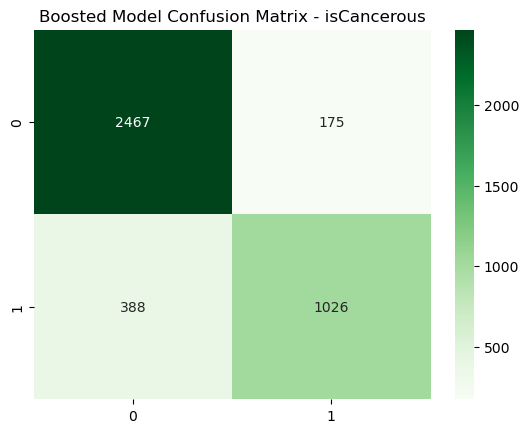

In [33]:
print("Boosted Model Evaluation (with data_labels_extraData.csv)")
print(classification_report(y_test_b, y_pred_b))
sns.heatmap(confusion_matrix(y_test_b, y_pred_b), annot=True, fmt='d', cmap='Greens')
plt.title("Boosted Model Confusion Matrix - isCancerous")
plt.show()

### Data Preprocessing and PCA

In [35]:
scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train_c)
X_test_std = scaler.transform(X_test_c)

In [36]:
normalizer = Normalizer()
X_train_norm = normalizer.fit_transform(X_train_c)
X_test_norm = normalizer.transform(X_test_c)

In [37]:
pca = PCA(n_components=50)
X_train_pca = pca.fit_transform(X_train_std)
X_test_pca = pca.transform(X_test_std)


In [38]:
print(f"PCA shape: {X_train_pca.shape}")

PCA shape: (7916, 50)


### Logistic Regression Baseline

In [39]:
log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train_std, y_train_c)
y_pred_log = log_model.predict(X_test_std)

In [40]:
print("Logistic Regression - isCancerous")
print(classification_report(y_test_c, y_pred_log))

Logistic Regression - isCancerous
              precision    recall  f1-score   support

           0       0.87      0.84      0.86      1164
           1       0.79      0.83      0.81       816

    accuracy                           0.84      1980
   macro avg       0.83      0.84      0.83      1980
weighted avg       0.84      0.84      0.84      1980



### Hyperparameter Tuning (RandomizedSearchCV)

In [41]:
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5]
}

In [43]:
rand_search = RandomizedSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_distributions=param_grid,
    n_iter=5,
    cv=3,
    scoring='f1_macro',
    n_jobs=-1,
    verbose=2
)

In [44]:
rand_search.fit(X_train_c, y_train_c)
print(f"Best Params: {rand_search.best_params_}")
print(f"Best F1 Score: {rand_search.best_score_:.4f}")

Fitting 3 folds for each of 5 candidates, totalling 15 fits
[CV] END max_depth=None, min_samples_split=2, n_estimators=100; total time=  29.1s
[CV] END max_depth=None, min_samples_split=2, n_estimators=150; total time=  43.3s
[CV] END max_depth=None, min_samples_split=2, n_estimators=150; total time=  44.2s
[CV] END max_depth=None, min_samples_split=2, n_estimators=150; total time=  44.3s
[CV] END .max_depth=20, min_samples_split=2, n_estimators=50; total time=  13.7s
[CV] END max_depth=None, min_samples_split=2, n_estimators=100; total time=  28.8s
[CV] END .max_depth=20, min_samples_split=2, n_estimators=50; total time=  13.8s
[CV] END .max_depth=10, min_samples_split=5, n_estimators=50; total time=  10.7s
[CV] END .max_depth=10, min_samples_split=5, n_estimators=50; total time=  10.7s
[CV] END max_depth=None, min_samples_split=2, n_estimators=100; total time=  28.3s
[CV] END .max_depth=20, min_samples_split=2, n_estimators=50; total time=  13.9s
[CV] END .max_depth=10, min_samples_s

### Export Predictions to CSV

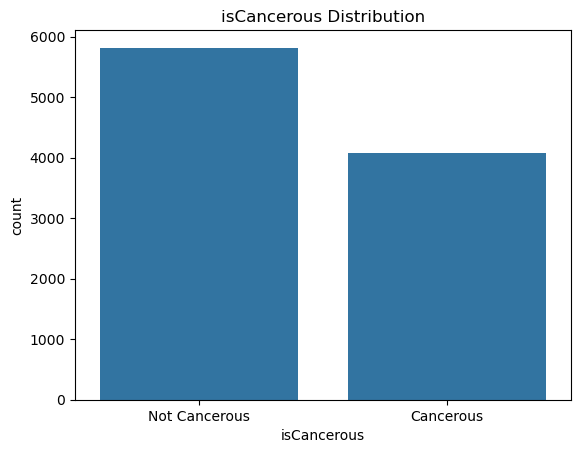

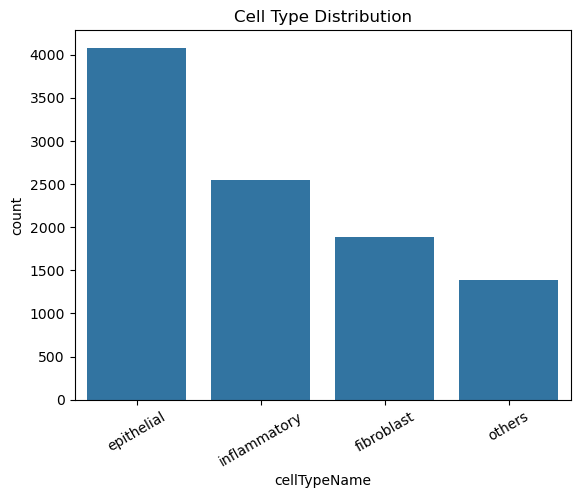

In [5]:
# Cancerous class distribution
sns.countplot(data=main_data, x='isCancerous')
plt.title("isCancerous Distribution")
plt.xticks([0, 1], ['Not Cancerous', 'Cancerous'])
plt.show()

# Cell type distribution
sns.countplot(data=main_data, x='cellTypeName', order=main_data['cellTypeName'].value_counts().index)
plt.title("Cell Type Distribution")
plt.xticks(rotation=30)
plt.show()

In [6]:
#Loading the images and flattening them

In [7]:
def load_images(df, label_col, image_col='ImageName', image_dir=IMAGE_DIR):
    X, y = [], []
    skipped = 0
    for _, row in df.iterrows():
        img_path = os.path.join(image_dir, row[image_col])
        if os.path.exists(img_path):
            img = Image.open(img_path).convert('RGB').resize((27, 27))
            X.append(np.array(img).flatten())
            y.append(row[label_col])
        else:
            print(f"Missing: {img_path}")
            skipped += 1
    print(f"Loaded: {len(X)} images | Skipped: {skipped}")
    return np.array(X), np.array(y)

In [8]:
#Binary Classification (isCancerous)

In [9]:
X_cancer, y_cancer = load_images(main_data, label_col='isCancerous')
X_train_c, X_test_c, y_train_c, y_test_c = train_test_split(X_cancer, y_cancer, test_size=0.2, stratify=y_cancer)

model_cancer = RandomForestClassifier(n_estimators=100, random_state=42)
model_cancer.fit(X_train_c, y_train_c)
y_pred_c = model_cancer.predict(X_test_c)

print("Cancer Classification Report")
print(classification_report(y_test_c, y_pred_c, target_names=["Not Cancerous", "Cancerous"]))

Loaded: 9896 images | Skipped: 0
Cancer Classification Report
               precision    recall  f1-score   support

Not Cancerous       0.86      0.93      0.89      1164
    Cancerous       0.89      0.78      0.83       816

     accuracy                           0.87      1980
    macro avg       0.87      0.86      0.86      1980
 weighted avg       0.87      0.87      0.87      1980



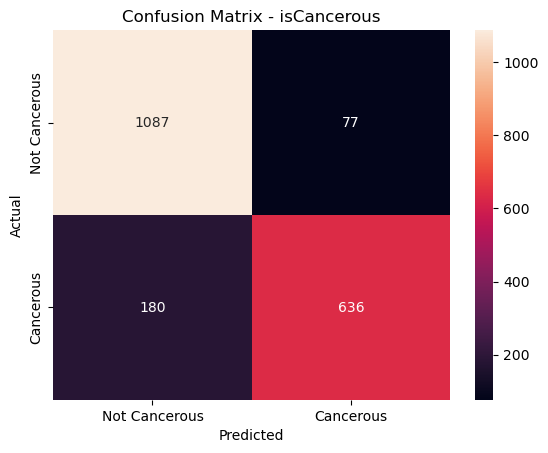

In [10]:
sns.heatmap(confusion_matrix(y_test_c, y_pred_c), annot=True, fmt='d',
            xticklabels=["Not Cancerous", "Cancerous"],
            yticklabels=["Not Cancerous", "Cancerous"])
plt.title("Confusion Matrix - isCancerous")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [11]:
#Multi-Class Classification (cellTypeName)

In [12]:
X_type, y_type = load_images(main_data, label_col='cellTypeName')

le = LabelEncoder()
y_type_enc = le.fit_transform(y_type)

X_train_t, X_test_t, y_train_t, y_test_t = train_test_split(X_type, y_type_enc, test_size=0.2, stratify=y_type_enc)

model_type = RandomForestClassifier(n_estimators=100, random_state=42)
model_type.fit(X_train_t, y_train_t)
y_pred_t = model_type.predict(X_test_t)

print("Cell Type Classification Report")
print(classification_report(y_test_t, y_pred_t, target_names=le.classes_))

Loaded: 9896 images | Skipped: 0
Cell Type Classification Report
              precision    recall  f1-score   support

  epithelial       0.74      0.92      0.82       816
  fibroblast       0.65      0.51      0.57       378
inflammatory       0.63      0.80      0.70       509
      others       0.70      0.07      0.13       277

    accuracy                           0.69      1980
   macro avg       0.68      0.57      0.55      1980
weighted avg       0.69      0.69      0.65      1980



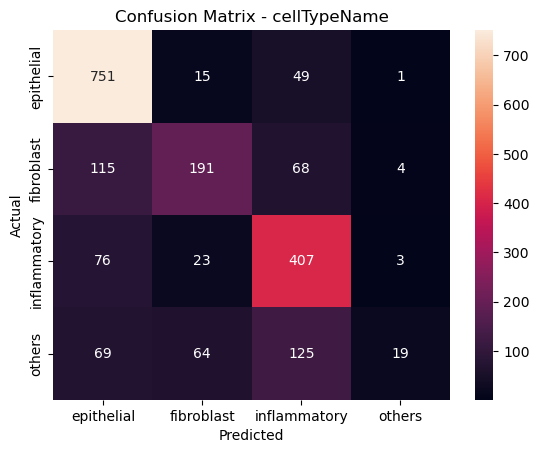

In [13]:
sns.heatmap(confusion_matrix(y_test_t, y_pred_t), annot=True, fmt='d',
            xticklabels=le.classes_, yticklabels=le.classes_)
plt.title("Confusion Matrix - cellTypeName")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [14]:
# Use Extra Data for Semi-Supervised Boosting. You can improve isCancerous model using extra labelled data:

In [15]:
combined_df = pd.concat([main_data[['ImageName', 'isCancerous']], extra_data[['ImageName', 'isCancerous']]])
X_combined, y_combined = load_images(combined_df, label_col='isCancerous')

X_train_cb, X_test_cb, y_train_cb, y_test_cb = train_test_split(X_combined, y_combined, test_size=0.2, stratify=y_combined)

Loaded: 20280 images | Skipped: 0


In [16]:
model_boosted = RandomForestClassifier(n_estimators=100, random_state=42)
model_boosted.fit(X_train_cb, y_train_cb)
y_pred_cb = model_boosted.predict(X_test_cb)

print("Boosted Model (with Extra Data)")
print(classification_report(y_test_cb, y_pred_cb))

Boosted Model (with Extra Data)
              precision    recall  f1-score   support

           0       0.86      0.94      0.90      2642
           1       0.86      0.71      0.78      1414

    accuracy                           0.86      4056
   macro avg       0.86      0.82      0.84      4056
weighted avg       0.86      0.86      0.86      4056



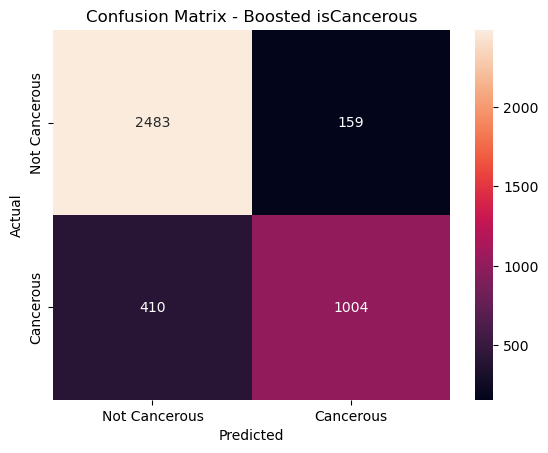

In [17]:
sns.heatmap(confusion_matrix(y_test_cb, y_pred_cb), annot=True, fmt='d',
            xticklabels=["Not Cancerous", "Cancerous"],
            yticklabels=["Not Cancerous", "Cancerous"])
plt.title("Confusion Matrix - Boosted isCancerous")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [18]:
# Data Preprocessing (Standardisation + PCA)

In [19]:
from sklearn.preprocessing import StandardScaler, Normalizer
from sklearn.decomposition import PCA

# Standardise the cancer dataset
scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train_c)
X_test_std = scaler.transform(X_test_c)

# Normalise the cancer dataset
normalizer = Normalizer()
X_train_norm = normalizer.fit_transform(X_train_c)
X_test_norm = normalizer.transform(X_test_c)

# Apply PCA on standardised data
pca = PCA(n_components=50)  # Choose components to retain ~95% variance
X_train_pca = pca.fit_transform(X_train_std)
X_test_pca = pca.transform(X_test_std)

print(f"Original shape: {X_train_c.shape} → PCA shape: {X_train_pca.shape}")


Original shape: (7916, 2187) → PCA shape: (7916, 50)


In [20]:
# Baseline: Linear Regression (for Cancer Classification)

In [21]:
from sklearn.linear_model import LogisticRegression, PoissonRegressor

# Logistic Regression (binary)
log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train_std, y_train_c)
log_pred = log_model.predict(X_test_std)

print("Logistic Regression Report (isCancerous)")
print(classification_report(y_test_c, log_pred))

Logistic Regression Report (isCancerous)
              precision    recall  f1-score   support

           0       0.85      0.85      0.85      1164
           1       0.78      0.79      0.79       816

    accuracy                           0.82      1980
   macro avg       0.82      0.82      0.82      1980
weighted avg       0.82      0.82      0.82      1980



/Users/aryabaddam/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [22]:
#  Hyperparameter Tuning (RandomisedSearch Example)

In [24]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier

# Define a smaller, randomized search space
random_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5]
}

# Run randomized search with 5 iterations and full CPU usage
rand_search = RandomizedSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_distributions=random_grid,
    n_iter=5,  # Limits to 5 random combinations
    cv=3,
    scoring='f1_macro',
    n_jobs=-1,
    verbose=2,
    random_state=42
)

# Fit the model
rand_search.fit(X_train_c, y_train_c)

# Display best parameters and performance
print(f"✅ Best parameters: {rand_search.best_params_}")
print(f"🎯 Best F1 score (macro avg): {rand_search.best_score_:.4f}")

Fitting 3 folds for each of 5 candidates, totalling 15 fits
[CV] END .max_depth=10, min_samples_split=2, n_estimators=50; total time=  13.1s
[CV] END .max_depth=10, min_samples_split=2, n_estimators=50; total time=  13.2s
[CV] END .max_depth=10, min_samples_split=2, n_estimators=50; total time=  13.2s
[CV] END max_depth=10, min_samples_split=2, n_estimators=100; total time=  25.3s
[CV] END max_depth=10, min_samples_split=2, n_estimators=100; total time=  24.7s
[CV] END max_depth=10, min_samples_split=2, n_estimators=100; total time=  24.8s
[CV] END max_depth=20, min_samples_split=2, n_estimators=150; total time=  49.4s
[CV] END max_depth=20, min_samples_split=2, n_estimators=150; total time=  49.5s
[CV] END max_depth=10, min_samples_split=5, n_estimators=150; total time=  38.3s
[CV] END max_depth=20, min_samples_split=2, n_estimators=150; total time=  48.3s
[CV] END .max_depth=10, min_samples_split=5, n_estimators=50; total time=  11.0s
[CV] END max_depth=10, min_samples_split=5, n_est